In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats
from scipy.stats import chi2,chi2_contingency
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_csv("C:/Users/admin/OneDrive/Desktop/mlprojects1/myprojects/india population prediction using linear regn/india population.csv")

In [3]:
df = pd.DataFrame(df)

In [4]:
df

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081.0,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620
6,2020,1.04,13970396,-532687.0,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,1380004385
7,2019,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,1366417754
8,2018,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,1352642280
9,2017,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,1338676785


In [5]:
df.describe()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,India\nGlobal Rank,Population
count,24.000000,24.000000,2.400000e+01,23.000000,24.000000,24.000000,24.000000,24.00000,2.400000e+01,24.000000,24.000000,2.400000e+01
mean,2005.000000,1.412917,1.286815e+07,-252570.869565,25.962500,3.479583,374.583333,31.53750,3.881687e+08,16.776250,1.791667,1.113504e+09
std,27.489128,0.666897,4.239948e+06,286175.441586,5.752188,1.447566,136.433745,10.10806,2.378749e+08,1.098227,0.414851,4.058605e+08
min,1955.000000,0.230000,3.711367e+06,-532687.000000,19.300000,2.240000,138.000000,17.60000,7.195850e+07,14.780000,1.000000,4.098806e+08
25%,1983.750000,0.995000,9.941006e+06,-500592.000000,20.675000,2.240000,256.750000,23.97500,1.829768e+08,15.995000,2.000000,7.630082e+08
50%,2012.500000,1.335000,1.387048e+07,-414772.000000,25.950000,2.600000,428.000000,31.75000,4.049070e+08,17.255000,2.000000,1.272217e+09
75%,2021.250000,2.010000,1.565104e+07,-25972.500000,28.800000,4.752500,469.500000,35.65000,4.980096e+08,17.702500,2.000000,1.396256e+09
max,2050.000000,2.330000,1.853059e+07,421208.000000,38.100000,5.900000,551.000000,53.50000,8.766130e+08,17.750000,2.000000,1.639176e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     int64  
 1   Yearly % 
Change              24 non-null     float64
 2   Yearly
Change                 24 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     int64  
 7   Urban
Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     int64  
 9   Country's Share of
World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India
Global Rank             24 non-null     int64  
 12  Population                    24 non-null     int64  
dtypes: floa

### Checking Null values for each Column

In [10]:
df.isnull().sum()

Year                             0
Yearly % \nChange                0
Yearly\nChange                   0
Migrants (net)                   1
Median Age                       0
Fertility Rate                   0
Density (P/Km²)                  0
Urban\nPop %                     0
Urban Population                 0
Country's Share of\nWorld Pop    0
World Population                 0
India\nGlobal Rank               0
Population                       0
dtype: int64

In [ ]:
df.rename(columns = {'Yearly % \nChange':'Year%'}, inplace = True)
df.rename(columns = {'Median Age':'Median_Age'}, inplace = True)
df.rename(columns = {'Fertility Rate':'Fertility_Rate'}, inplace = True)
df.rename(columns = {'Density (P/Km²)':'Density'}, inplace = True)
df.rename(columns = {'Urban\nPop %':'Urban'}, inplace = True)
df.rename(columns = {'Urban Population':'Urban_Population'}, inplace = True)
df.rename(columns = {"Country's Share of\nWorld Pop":'Country_Share'}, inplace = True)
df.rename(columns = {'World Population':'World_Population'}, inplace = True)

# HeatMap for Null Values

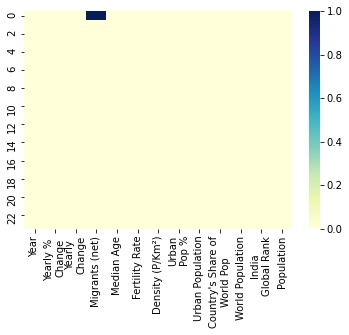

In [13]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

# EDA 

# Population (Continuous) Target Variable

In [45]:
df['Population'].isnull().sum()

0

In [54]:
df.Population.value_counts()

698952844     1
1234281170    1
1639176033    1
1553723810    1
784360008     1
1445011620    1
555189792     1
873277798     1
1147609927    1
1352642280    1
409880595     1
499123324     1
1056575549    1
1380004385    1
623102897     1
1338676785    1
1503642322    1
1324517249    1
450547679     1
1310152403    1
1592691513    1
1366417754    1
963922588     1
1620619200    1
Name: Population, dtype: int64

Text(0.5, 1.0, 'Histogram for population')

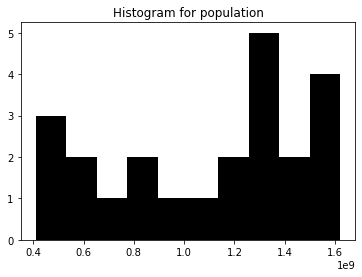

In [51]:
plt.hist(df['Population'], color = 'Black')
plt.title("Histogram for population")

Text(0.5, 1.0, 'Distribution plot for Population')

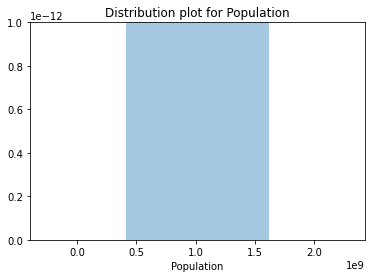

In [53]:
sns.distplot(df.Population)
plt.title("Distribution plot for Population")

Text(0.5, 1.0, 'Distribution plot for Population')

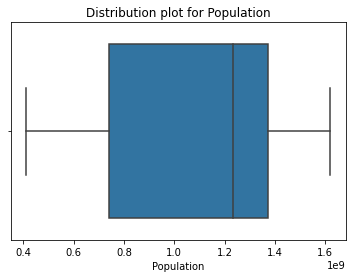

In [54]:
sns.boxplot(df.Population)
plt.title("Distribution plot for Population")

## Year (Continuous)

In [14]:
df['Year'].isnull().sum()

0

In [15]:
df.Year.value_counts()

2015    1
2045    1
2017    1
2050    1
2019    1
2020    1
1990    1
1960    1
2025    1
1955    1
1995    1
1965    1
2030    1
2018    1
2000    1
1985    1
2035    1
2005    1
1975    1
2040    1
1970    1
2010    1
1980    1
2016    1
Name: Year, dtype: int64

Text(0.5, 1.0, 'Histogram for Year')

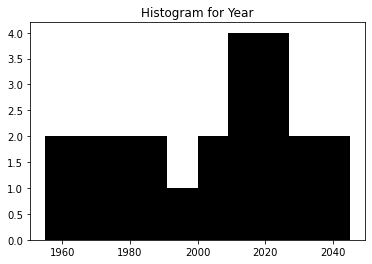

In [57]:
plt.hist(df['Year'], color = 'Black')
plt.title("Histogram for Year")

Text(0.5, 1.0, 'Scatter plot for Year')

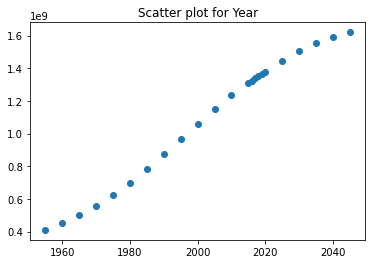

In [58]:
plt.scatter(df.Year,df.Population)
plt.title("Scatter plot for Year")

Text(0.5, 1.0, 'Distribution plot for Year')

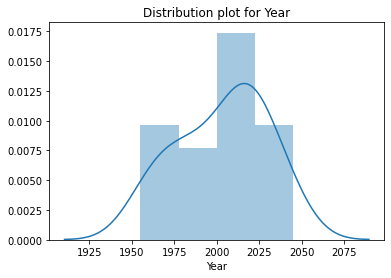

In [59]:
sns.distplot(df.Year)
plt.title("Distribution plot for Year")

Text(0.5, 1.0, 'Box plot for Year')

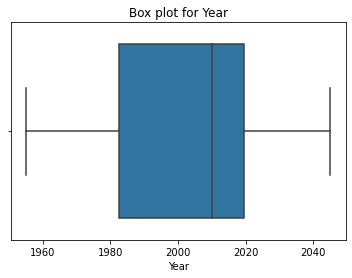

In [60]:
sns.boxplot(df.Year)
plt.title("Box plot for Year")

In [30]:
corr,_ = pearsonr(df.Year,df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.993


In [31]:
scipy.stats.pearsonr(df.Year,df.Population)

(0.9926346372884732, 1.1523293501324437e-21)

### As Year has Correlation > 0.5 so we reject Null hypothesis So it is a GOOD Predictor

# Yearly % \nChange (Continuous)

In [62]:
df['Year%'].isnull().sum()

0

In [63]:
df['Year%'].value_counts().sort_values()

1.72    1
2.15    1
0.80    1
0.35    1
1.07    1
1.99    1
1.10    1
1.67    1
1.91    1
1.47    1
0.50    1
1.20    1
2.17    1
1.02    1
0.92    1
0.66    1
2.32    1
2.07    1
1.85    1
2.33    2
1.04    2
Name: Year%, dtype: int64

Text(0.5, 1.0, 'Histogram for Year%')

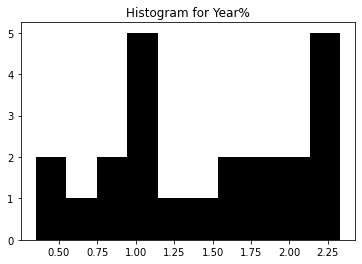

In [64]:
plt.hist(df['Year%'], color = 'Black')
plt.title("Histogram for Year%")

Text(0.5, 1.0, 'Scatter plot for Year')

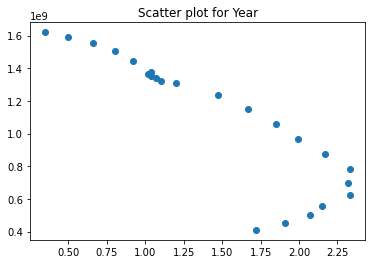

In [65]:
plt.scatter(df['Year%'],df.Population)
plt.title("Scatter plot for Year")

Text(0.5, 1.0, 'Distribution plot for Year')

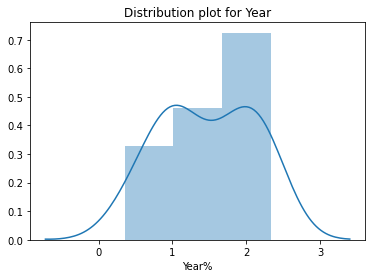

In [66]:
sns.distplot(df['Year%'])
plt.title("Distribution plot for Year")

Text(0.5, 1.0, 'Box plot for Year')

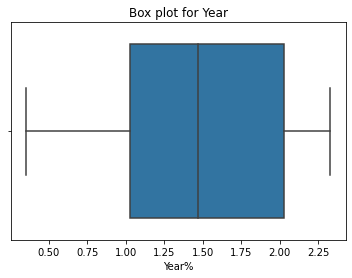

In [67]:
sns.boxplot(df['Year%'])
plt.title("Box plot for Year")

In [45]:
corr,_ = pearsonr(df['Year%'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.895


In [46]:
scipy.stats.pearsonr(df['Year%'],df.Population)

(-0.8949231865316978, 3.628237004775945e-09)

### As 'Yearly % \nChange' has correlation < 0.5 so we reject Null hypothesis So it is a GOOD Predictor

# Yearly\nChange (Continuous)

In [47]:
df['Yearly\nChange'].isnull().sum()

0

In [52]:
df['Yearly\nChange'].value_counts().sort_values()

18128958    1
11213294    1
17081433    1
9715129     1
13970396    1
15169989    1
13775474    1
15174247    1
14159536    1
18206876    1
14364846    1
13001447    1
10016298    1
17334249    1
17783558    1
3711367     1
13965495    1
7793541     1
6711079     1
8133417     1
5585537     1
13582621    1
11726140    1
18530592    1
Name: Yearly\nChange, dtype: int64

Text(0.5, 1.0, 'Histogram for Yearly\nChange')

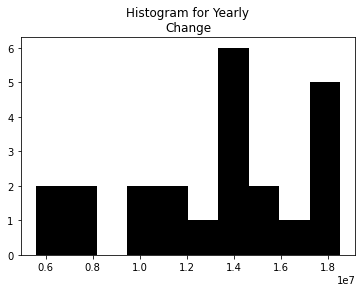

In [68]:
plt.hist(df['Yearly\nChange'], color = 'Black')
plt.title("Histogram for Yearly\nChange")

Text(0.5, 1.0, 'Scatter plot for Yearly\nChange')

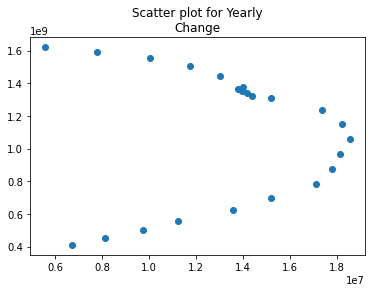

In [69]:
plt.scatter(df['Yearly\nChange'],df.Population)
plt.title("Scatter plot for Yearly\nChange")

Text(0.5, 1.0, 'Distribution Plot for Yearly\nChange')

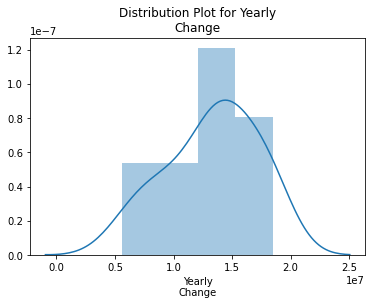

In [70]:
sns.distplot(df['Yearly\nChange'])
plt.title("Distribution Plot for Yearly\nChange")

Text(0.5, 1.0, 'Box plot for Yearly\nChange')

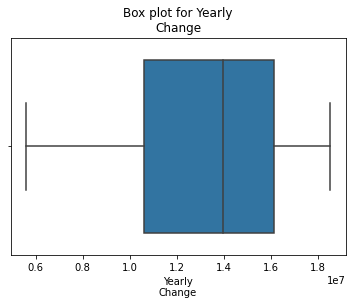

In [71]:
sns.boxplot(df['Yearly\nChange'])
plt.title("Box plot for Yearly\nChange")

In [61]:
corr,_ = pearsonr(df['Yearly\nChange'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.118


In [62]:
scipy.stats.pearsonr(df['Yearly\nChange'],df.Population)

(-0.11816992150421071, 0.5823601353372267)

### As 'Yearly\nChange' has a correlation < 0.5 so we Accept Null hypothesis So it is a BAD Predictor

# Migrants (net) (Continuous)

In [63]:
df['Migrants (net)'].isnull().sum()

1

In [64]:
df['Migrants (net)'].value_counts().sort_values()

-470015.0    1
-17078.0     1
-440124.0    1
 115942.0    1
-30805.0     1
-21140.0     1
-415736.0    1
 222247.0    1
-68569.0     1
 9030.0      1
-136514.0    1
-414772.0    1
 421208.0    1
-415732.0    1
-464081.0    1
-531169.0    1
-110590.0    1
-377797.0    1
-532687.0    5
Name: Migrants (net), dtype: int64

In [72]:
df['Migrants (net)'] = df['Migrants (net)'].fillna(df['Migrants (net)'].median())

In [66]:
df['Migrants (net)'].isnull().sum()

0

In [67]:
df['Migrants (net)'].value_counts().sort_values()

-470015.0    1
-17078.0     1
-440124.0    1
 115942.0    1
-30805.0     1
-21140.0     1
-415736.0    1
 222247.0    1
-68569.0     1
 9030.0      1
-136514.0    1
 421208.0    1
-415732.0    1
-464081.0    1
-531169.0    1
-110590.0    1
-377797.0    1
-414772.0    2
-532687.0    5
Name: Migrants (net), dtype: int64

Text(0.5, 1.0, 'Histogram for Migrants (net)')

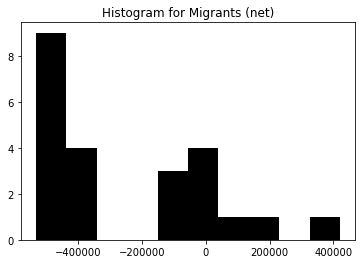

In [73]:
plt.hist(df['Migrants (net)'], color = 'Black')
plt.title("Histogram for Migrants (net)")

Text(0.5, 1.0, 'Scatter Plot for Migrants (net)')

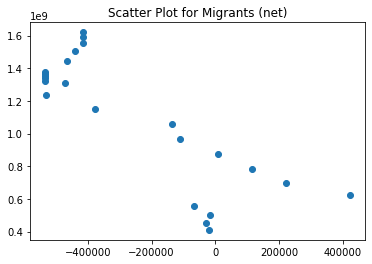

In [74]:
plt.scatter(df['Migrants (net)'],df.Population)
plt.title("Scatter Plot for Migrants (net)")

Text(0.5, 1.0, 'Distribution plot for Migrants (net)')

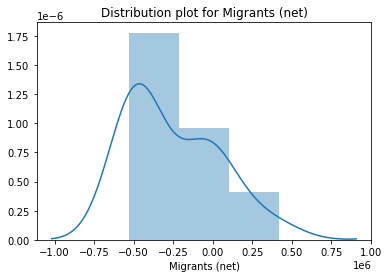

In [75]:
sns.distplot(df['Migrants (net)'])
plt.title("Distribution plot for Migrants (net)")

Text(0.5, 1.0, 'Box plot for Migrants (net)')

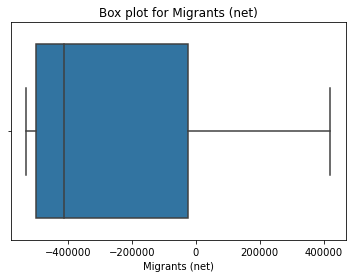

In [76]:
sns.boxplot(df['Migrants (net)'])
plt.title("Box plot for Migrants (net)")

In [72]:
corr,_ = pearsonr(df['Migrants (net)'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.826


In [73]:
scipy.stats.pearsonr(df['Migrants (net)'],df.Population)

(-0.8258361443754704, 6.720893511205112e-07)

### As 'Migrants (net)' has a correlation < 0.5 so we Accept Null hypothesis So it is a BAD Predictor

# Median Age (Continuous)

In [74]:
df['Median_Age'].isnull().sum()

0

In [77]:
df['Median_Age'].value_counts().sort_values()

31.7    1
28.4    1
33.3    1
23.8    1
25.1    1
20.7    1
21.1    1
22.7    1
19.7    1
35.0    1
19.3    1
26.8    1
19.6    1
30.0    1
36.6    1
21.8    1
20.6    1
20.2    2
27.1    4
Name: Median_Age, dtype: int64

Text(0.5, 1.0, 'Histogram for Median_Age')

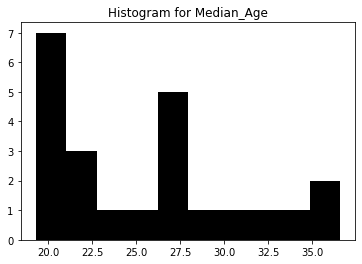

In [79]:
plt.hist(df['Median_Age'], color = 'Black')
plt.title("Histogram for Median_Age")

Text(0.5, 1.0, 'Scatter plot for Median_Age')

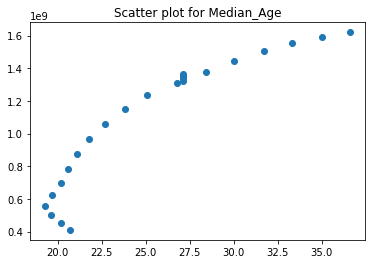

In [81]:
plt.scatter(df['Median_Age'],df.Population)
plt.title("Scatter plot for Median_Age")

Text(0.5, 1.0, 'Distribution plot for Median_Age')

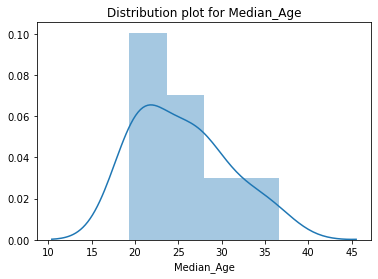

In [82]:
sns.distplot(df['Median_Age'])
plt.title("Distribution plot for Median_Age")

Text(0.5, 1.0, 'Box plot for Median_Age')

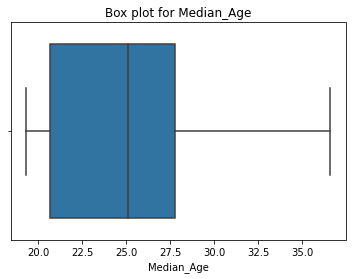

In [83]:
sns.boxplot(df['Median_Age'])
plt.title("Box plot for Median_Age")

In [80]:
corr,_ = pearsonr(df['Median Age'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.912


In [81]:
scipy.stats.pearsonr(df['Median Age'],df.Population)

(0.9117719182649223, 5.751454303711166e-10)

### As 'Median Age' has a correlation > 0.5 so we reject Null hypothesis So it is a Good Predictor

# Fertility Rate (Continuous)

In [82]:
df['Fertility_Rate'].isnull().sum()

0

In [83]:
df['Fertility_Rate'].value_counts().sort_values()

4.97    1
2.80    1
5.72    1
3.48    1
4.68    1
3.83    1
2.40    1
4.27    1
3.14    1
5.89    1
5.41    1
5.90    2
2.36    4
2.24    7
Name: Fertility Rate, dtype: int64

Text(0.5, 1.0, 'Histogram for Fertility_Rate')

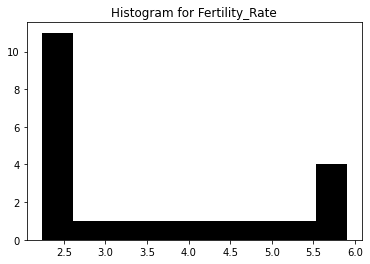

In [84]:
plt.hist(df['Fertility_Rate'], color = 'Black')
plt.title("Histogram for Fertility_Rate")

Text(0.5, 1.0, 'Scatter plot for Fertility Rate')

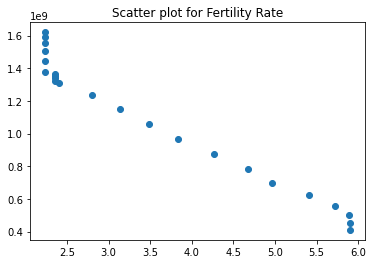

In [85]:
plt.scatter(df['Fertility_Rate'],df.Population)
plt.title("Scatter plot for Fertility Rate")

Text(0.5, 1.0, 'Distribution for Fertility Rate')

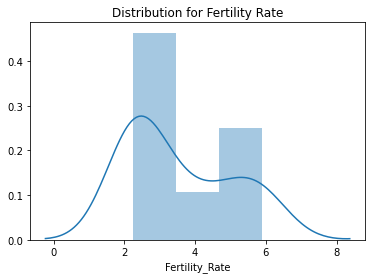

In [86]:
sns.distplot(df['Fertility_Rate'])
plt.title("Distribution for Fertility Rate")

Text(0.5, 1.0, 'Box Plot for Fertility Rate')

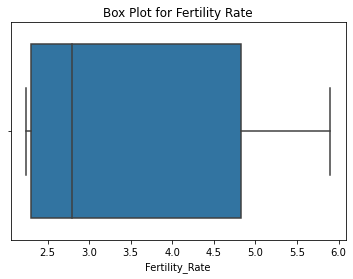

In [87]:
sns.boxplot(df['Fertility_Rate'])
plt.title("Box Plot for Fertility Rate")

In [88]:
corr,_ = pearsonr(df['Fertility Rate'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.979


In [89]:
scipy.stats.pearsonr(df['Fertility Rate'],df.Population)

(-0.9791819764259315, 9.961730924671182e-17)

### As 'Fertility Rate' has a correlation > 0.5 so we Reject Null hypothesis So it is a GOOD Predictor

# Density (P/Km²) (Continuous)

In [91]:
df['Density'].isnull().sum()

0

In [92]:
df['Density'].value_counts().sort_values()

415    1
168    1
294    1
506    1
441    1
536    1
235    1
210    1
464    1
138    1
355    1
460    1
523    1
187    1
264    1
455    1
551    1
486    1
324    1
386    1
450    1
152    1
445    1
545    1
Name: Density (P/Km²), dtype: int64

Text(0.5, 1.0, 'Histogram for Density')

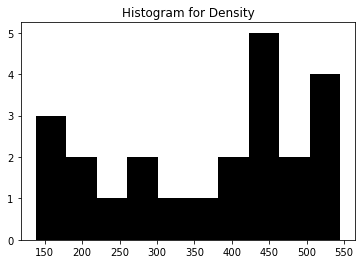

In [88]:
plt.hist(df['Density'], color = 'Black')
plt.title("Histogram for Density")

Text(0.5, 1.0, 'Scatter plot for Density')

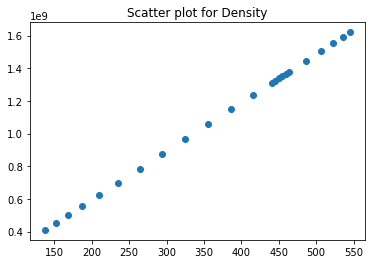

In [89]:
plt.scatter(df['Density'],df.Population)
plt.title("Scatter plot for Density")

Text(0.5, 1.0, 'Distribution plot for Density')

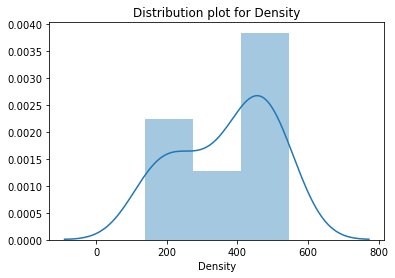

In [90]:
sns.distplot(df['Density'])
plt.title("Distribution plot for Density")

Text(0.5, 1.0, 'Box Plot for Density')

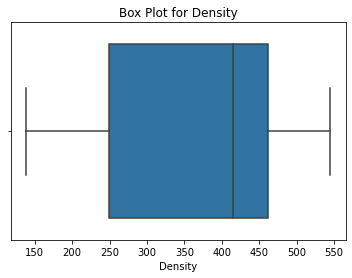

In [91]:
sns.boxplot(df['Density'])
plt.title("Box Plot for Density")

In [98]:
corr,_ = pearsonr(df['Density'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 1.000


In [99]:
scipy.stats.pearsonr(df['Density'],df.Population)

(0.9999980575544164, 5.116333085047382e-61)

###  As 'Density (P/Km²)' has a correlation > 0.5 so we Reject Null hypothesis So it is a GOOD Predictor

# Urban\nPop % (Continuous)

In [92]:
df['Urban'].isnull().sum()

0

In [101]:
df['Urban'].value_counts().sort_values() 

30.8    1
37.6    1
46.7    1
17.9    1
18.7    1
21.3    1
33.6    1
33.2    1
19.7    1
17.6    1
32.7    1
50.1    1
40.4    1
23.0    1
29.1    1
25.5    1
34.1    1
26.5    1
34.5    1
35.0    1
43.5    1
27.6    1
24.3    1
53.5    1
Name: Urban\nPop %, dtype: int64

Text(0.5, 1.0, 'Histogram for Urban')

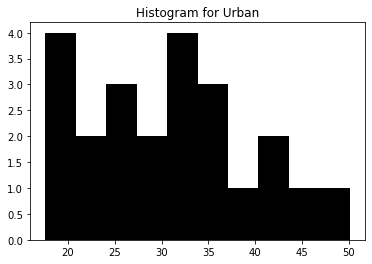

In [93]:
plt.hist(df['Urban'], color = 'Black')
plt.title("Histogram for Urban")

Text(0.5, 1.0, 'Scatter plot for Urban')

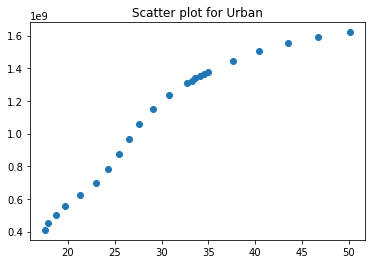

In [94]:
plt.scatter(df['Urban'],df.Population)
plt.title("Scatter plot for Urban")

Text(0.5, 1.0, 'Distribution plot for Urban')

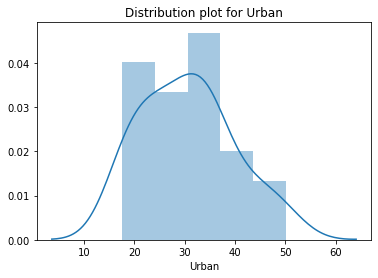

In [95]:
sns.distplot(df['Urban'])
plt.title("Distribution plot for Urban")

Text(0.5, 1.0, 'Box plot for Urban')

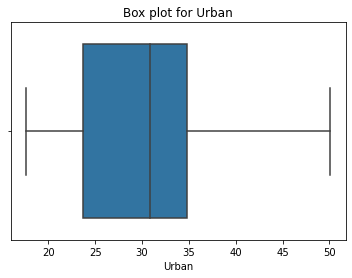

In [96]:
sns.boxplot(df['Urban'])
plt.title("Box plot for Urban")

In [7]:
Q3_Urban = df['Urban\nPop %'].quantile(0.75)
print(Q3_Urban)
Q1_Urban = df['Urban\nPop %'].quantile(0.25)
print(Q1_Urban)

35.65
23.975


In [8]:
IQR_Urban = Q3_Urban - Q1_Urban
IQR_Urban

11.674999999999997

In [9]:
UL_Urban = Q3_Urban + (1.5*IQR_Urban)
print(UL_Urban)
LL_Urban = Q1_Urban - (1.5*IQR_Urban)
print(LL_Urban)

53.162499999999994
6.462500000000006


In [13]:
df['Urban\nPop %'][(df['Urban\nPop %']>UL_Urban)].value_counts().sum()

0

In [10]:
df['Urban\nPop %'][(df['Urban\nPop %']<LL_Urban)].value_counts().sum()

0

In [11]:
df[df['Urban\nPop %']> UL_Urban]

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033


In [12]:
df = df.drop([0])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          23 non-null     int64  
 1   Yearly % 
Change              23 non-null     float64
 2   Yearly
Change                 23 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    23 non-null     float64
 5   Fertility Rate                23 non-null     float64
 6   Density (P/Km²)               23 non-null     int64  
 7   Urban
Pop %                   23 non-null     float64
 8   Urban Population              23 non-null     int64  
 9   Country's Share of
World Pop  23 non-null     float64
 10  World Population              23 non-null     object 
 11  India
Global Rank             23 non-null     int64  
 12  Population                    23 non-null     int64  
dtypes: floa

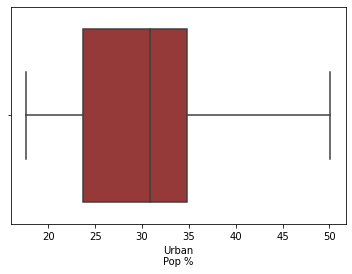

In [10]:
sns.boxplot(df['Urban], color = 'brown')

In [120]:
corr,_ = pearsonr(df['Urban\nPop %'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.955


In [121]:
scipy.stats.pearsonr(df['Urban\nPop %'],df.Population)

(0.955012849123751, 1.473496762199543e-12)

### As 'Urban\nPop %' has a correlation > 0.5 so we Reject Null hypothesis So it is a GOOD Predictor

# Urban Population (Continuous)

In [123]:
df['Urban Population'].isnull().sum()

0

In [124]:
df['Urban Population'].value_counts().sort_values()

93493844     1
160941941    1
291350282    1
109388950    1
222296728    1
811749463    1
190321782    1
449963381    1
460779764    1
429069459    1
607341981    1
439391699    1
744380367    1
334479406    1
542742539    1
380744554    1
255558824    1
471828295    1
675456367    1
71958495     1
132533810    1
483098640    1
80565723     1
Name: Urban Population, dtype: int64

Text(0.5, 1.0, 'Histogram for Urban Population')

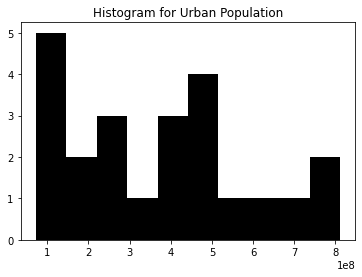

In [97]:
plt.hist(df['Urban_Population'], color = 'Black')
plt.title("Histogram for Urban Population")

Text(0.5, 1.0, 'Scatter Plot for Urban Population')

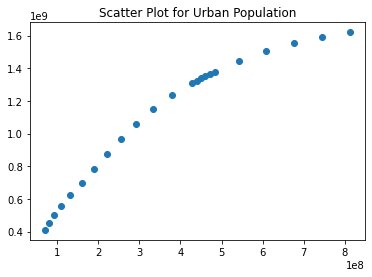

In [98]:
plt.scatter(df['Urban_Population'],df.Population)
plt.title("Scatter Plot for Urban Population")

Text(0.5, 1.0, 'Distribution Plot for Urban Population')

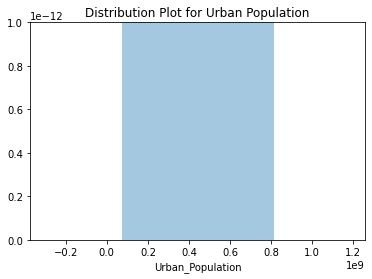

In [99]:
sns.distplot(df['Urban_Population'])
plt.title("Distribution Plot for Urban Population")

Text(0.5, 1.0, 'Box Plot for Urban Population')

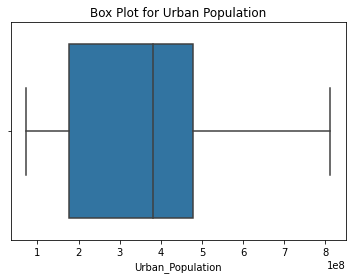

In [100]:
sns.boxplot(df['Urban_Population'])
plt.title("Box Plot for Urban Population")

In [146]:
corr,_ = pearsonr(df['Urban Population'],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.961


In [147]:
scipy.stats.pearsonr(df['Urban Population'],df.Population)

(0.960935066988385, 3.435914836279112e-13)

### As 'Urban Population' has a correlation > 0.5 so we Reject Null hypothesis So it is a GOOD Predictor

# Country's Share of\nWorld Pop (Continuous)

In [148]:
df["Country_Share"].isnull().sum()

0

In [149]:
df["Country_Share"].value_counts().sort_values()

16.78    1
17.71    1
16.10    1
14.95    1
17.54    1
17.66    1
17.09    1
16.39    1
15.27    1
14.85    1
17.20    1
17.48    1
17.70    1
15.68    1
17.73    1
15.00    1
17.31    1
14.78    1
17.59    1
17.74    2
17.75    2
Name: Country's Share of\nWorld Pop, dtype: int64

Text(0.5, 1.0, 'Histogram for Country Share')

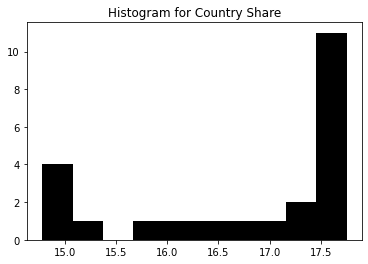

In [101]:
plt.hist(df["Country_Share"], color = 'Black')
plt.title("Histogram for Country Share")

Text(0.5, 1.0, 'Scatter plot for Country Share')

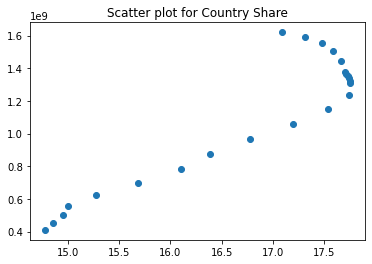

In [102]:
plt.scatter(df["Country_Share"],df.Population)
plt.title("Scatter plot for Country Share")

Text(0.5, 1.0, 'Distribution plot for Country Share')

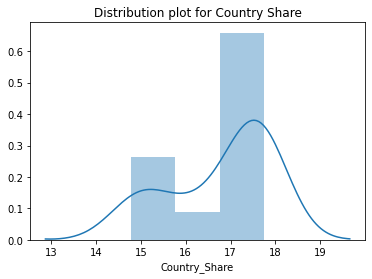

In [103]:
sns.distplot(df["Country_Share"])
plt.title("Distribution plot for Country Share")

Text(0.5, 1.0, 'Box plot for Country Share')

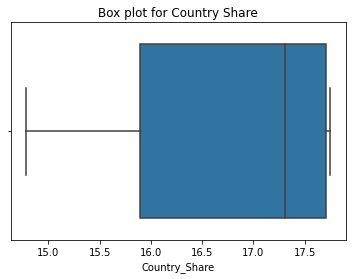

In [104]:
sns.boxplot(df["Country_Share"])
plt.title("Box plot for Country Share")

In [154]:
corr,_ = pearsonr(df["Country's Share of\nWorld Pop"],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.921


In [155]:
scipy.stats.pearsonr(df["Country's Share of\nWorld Pop"],df.Population)

(0.9214994897969809, 4.38786873921326e-10)

### As 'Country's Share of\nWorld Pop' has a correlation > 0.5 so we Reject Null hypothesis So it is a GOOD Predictor

# World Population (Continuous)

In [157]:
df["World_Population"].isnull().sum()

0

In [158]:
df["World_Population"].value_counts().sort_values()

7713468100        1
3034949748        1
8184437460        1
5327231061        1
4870921740        1
6143493823        1
7794798739        1
8548487400        1
4079480606        1
4458003514        1
5744212979        1
3339583597        1
6541907027        1
7547858925        1
2,77,30,19,936    1
7379797139        1
7631091040        1
3700437046        1
9198847240        1
7464022049        1
6956823603        1
9481803274        1
8887524213        1
Name: World Population, dtype: int64

Text(0.5, 1.0, 'Histogram for World Population')

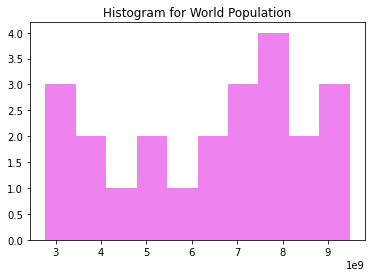

In [105]:
plt.hist(df["World_Population"], color = 'violet')
plt.title("Histogram for World Population")

Text(0.5, 1.0, 'Scatter plot for World Population')

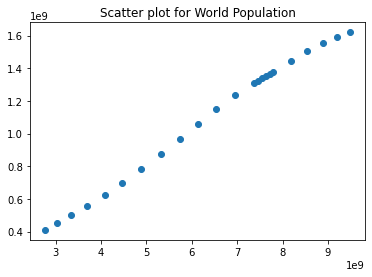

In [106]:
plt.scatter(df["World_Population"],df.Population)
plt.title("Scatter plot for World Population")

In [32]:
df['World_Population']=df['World_Population'].str.replace(',','')

In [38]:
df.World_Population

1     9481803274
2     9198847240
3     8887524213
4     8548487400
5     8184437460
6     7794798739
7     7713468100
8     7631091040
9     7547858925
10    7464022049
11    7379797139
12    6956823603
13    6541907027
14    6143493823
15    5744212979
16    5327231061
17    4870921740
18    4458003514
19    4079480606
20    3700437046
21    3339583597
22    3034949748
23    2773019936
Name: World_Population, dtype: int64

Text(0.5, 1.0, 'Distribution for World Population')

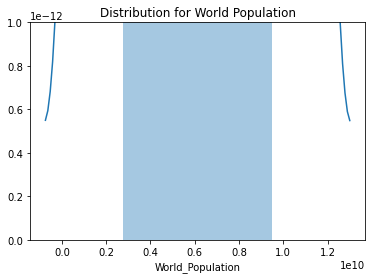

In [109]:
sns.distplot(df["World_Population"])
plt.title("Distribution for World Population")

In [34]:
df['World_Population'] = df['World_Population'].astype('int')

Text(0.5, 1.0, 'Box plot for World Population')

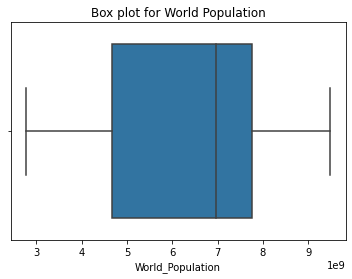

In [110]:
sns.boxplot(df['World_Population'])
plt.title("Box plot for World Population")

In [27]:
corr,_ = pearsonr(df["World Population"],df.Population)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.997


In [28]:
scipy.stats.pearsonr(df["World Population"],df.Population)

(0.9971637524423023, 3.248341270860521e-26)

### As 'World Population' has a correlation > 0.5 so we Reject Null hypothesis So it is a GOOD Predictor

# India\nGlobal Rank (Categorical)

In [29]:
df['India\nGlobal Rank'].isnull().sum()

0

In [30]:
df["India\nGlobal Rank"].value_counts().sort_values()

1     5
2    19
Name: India\nGlobal Rank, dtype: int64

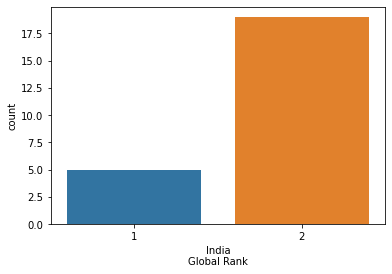

In [31]:
sns.countplot(df['India\nGlobal Rank'])

Text(0.5, 1.0, 'Box Plot for India and Population')

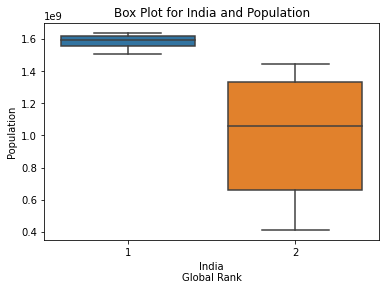

In [35]:
sns.boxplot(x= 'India\nGlobal Rank',y="Population", data=df)
plt.title("Box Plot for India and Population")

In [ ]:
df.rename(columns = {'India\nGlobal Rank':'India'}, inplace = True)

In [44]:
mod = ols('Population ~ India', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

            df        sum_sq       mean_sq          F    PR(>F)
India      1.0  1.386068e+18  1.386068e+18  12.692116  0.001741
Residual  22.0  2.402554e+18  1.092070e+17        NaN       NaN


### As 'India' has p value < 0.05 so we reject Null hypothesis So it is a GOOD Predictor


In [16]:
df.rename(columns = {'Yearly % \nChange':'Year%'}, inplace=True)

In [11]:
df.rename(columns = {'Yearly % \nChange':'Year%'}, inplace = True)
df.rename(columns = {'Median Age':'Median_Age'}, inplace = True)
df.rename(columns = {'Fertility Rate':'Fertility_Rate'}, inplace = True)
df.rename(columns = {'Density (P/Km²)':'Density'}, inplace = True)
df.rename(columns = {'Urban\nPop %':'Urban'}, inplace = True)
df.rename(columns = {'Urban Population':'Urban_Population'}, inplace = True)
df.rename(columns = {"Country's Share of\nWorld Pop":'Country_Share'}, inplace = True)
df.rename(columns = {'World Population':'World_Population'}, inplace = True)

In [13]:
df.rename(columns = {'Year%':'Yearly'}, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               23 non-null     int64  
 1   Year%              23 non-null     float64
 2   Yearly
Change      23 non-null     int64  
 3   Migrants (net)     23 non-null     float64
 4   Median_Age         23 non-null     float64
 5   Fertility_Rate     23 non-null     float64
 6   Density            23 non-null     int64  
 7   Urban              23 non-null     float64
 8   Urban_Population   23 non-null     int64  
 9   Country_Share      23 non-null     float64
 10  World_Population   23 non-null     object 
 11  India
Global Rank  23 non-null     int64  
 12  Population         23 non-null     int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 2.5+ KB


# Model Buliding

In [3]:
x = df.iloc[:,:12]

In [4]:
y = df.Population

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)

In [14]:
model1_1=smf.ols(formula='Population ~ Yearly + Median_Age + Fertility_Rate + Density + Urban + Urban_Population + Country_Share + World_Population'
               ,data=df).fit()
print(model1_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 15 Aug 2022   Prob (F-statistic):                nan
Time:                        15:09:38   Log-Likelihood:                 149.07
No. Observations:                  24   AIC:                            -250.1
Df Residuals:                       0   BIC:                            -221.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [43]:
sc_X = StandardScaler()

In [44]:
xtrain = sc_X.fit_transform(xtrain)

In [45]:
xtest = sc_X.transform(xtest)

In [46]:
sgdr = SGDRegressor()

In [47]:
sgdr.fit(xtrain, ytrain)
score = sgdr.score(xtrain, ytrain)
print("R-Squared : ", score)

R-Squared :  0.9993973519182715


In [48]:
y_pred = sgdr.predict(xtest)

In [49]:
mse = mean_squared_error(ytest, y_pred)
print("RMSE : ", np.sqrt(mse))

RMSE :  7959645.254717458
